# "Canny Edge detection"
> "Detecting edges in an image"
- toc: false
- branch: master
- badges: true
- comments: true
- categories: [computer vision, image analysis, feature extraction]
- image: images/
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2
- use_math: true

### Hi. This notebook is inspired from an assignment in *Image analysis and Computer Vision* course which I attended in the fall semester 2020 at ETH Zuerich.  

### Here, we'll see how to detect edges in an image using Canny edge detection technique. Before we start, let's first see what is an edge ? 

### Edges are locations in an image where the variation of the intensity function $f(x,y)$ is high in certain direction, but low in the orthogonal direction. 


### Below are the steps to implement Canny Edge detection algorithm:
1. Smooth image using Gaussian filter
2. Determine intensity gradients along two different directions
3. Determine the magnitude and the direction of the gradient.
4. Apply Non-max suppression

#### Let's start by importing some useful libraries

In [1]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter,convolve
import matplotlib.pyplot as plt
from scipy import where
import cv2
%matplotlib inline
from skimage import io # a library that supports image processing applications on python.

In [2]:
# Read the image from url 
image_url = "https://raw.githubusercontent.com/aizardar/Computer-vision/main/Canny%20Edge%20Detection/Lenna.png"
im = io.imread(image_url)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY) # Convert image from RGB to gray scale image
print("Image shape = ", im.shape)
im = im.astype('float')


Image shape =  (512, 512)


(512, 512)


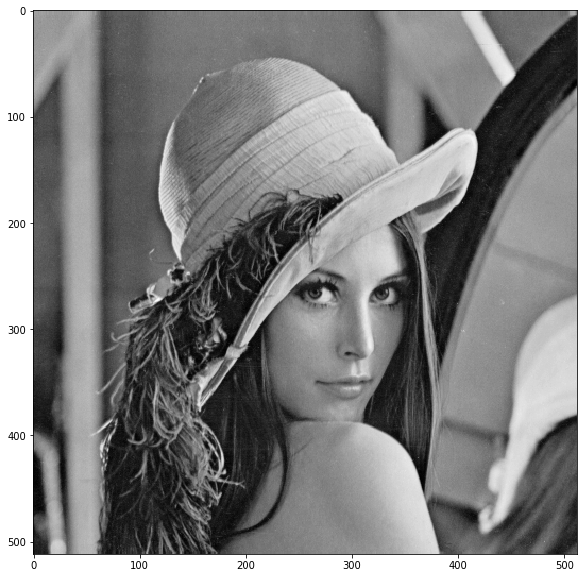

In [3]:
print(im.shape)
plt.figure(figsize=(10,10))
plt.imshow(im,cmap='gray')
plt.show()

### 1. Apply Gaussian filter to smoothen the image.

This is done to get rid of any noise in the image. 

(512, 512)


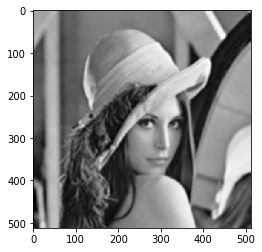

In [4]:

blurred_im = gaussian_filter(im, sigma=2, order = 0)
print(blurred_im.shape)
plt.imshow(blurred_im, cmap = 'gray')


### 2. Determine intensity gradients along two different directions

We can determine the intensity gradients using a Sobel mask filters 

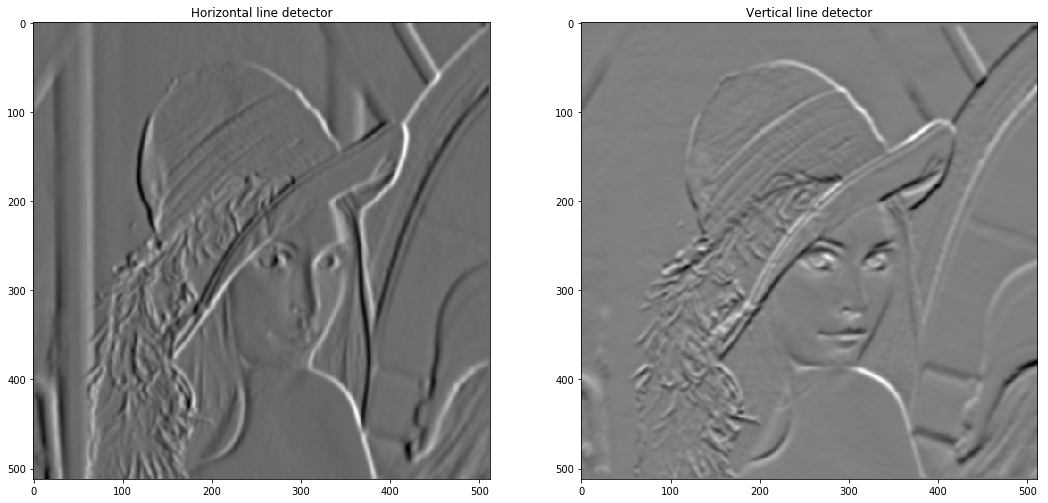

In [5]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

# Convolve the image with sobel masks

im_x = convolve(blurred_im,sobel_x)  
im_y = convolve(blurred_im,sobel_y)


f, ax = plt.subplots(1, 2, figsize=(18, 16))
ax[0].set_title("Horizontal line detector")
ax[1].set_title("Vertical line detector")
ax[0].imshow(im_x, cmap='gray')
ax[1].imshow(im_y, cmap='gray')


### 3. Get the magnitude and the direction of the gradient

At each pixel, we can determine the magnitdue and the direction of the gradient. The gradient mangnitude tell us about the strength of an edge while the direction of the gradient give us the orientation of an edge. 

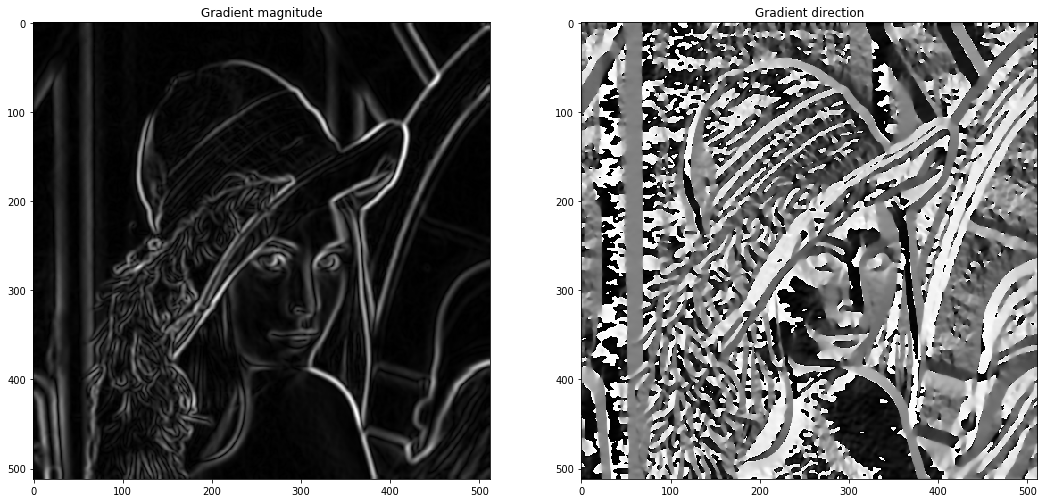

In [6]:
gradient = np.sqrt(im_x**2.0 + im_y**2.0)
theta = np.arctan2(im_y, im_x)

f, ax = plt.subplots(1, 2, figsize=(18, 16))
ax[0].set_title("Gradient magnitude")
ax[1].set_title("Gradient direction")
ax[0].imshow(gradient, cmap='gray')
ax[1].imshow(theta, cmap='gray')

### 4. Apply Non-Maximum-Suppression

Here, only those pixels are displayed which fulfills the threshold criterion and has a larger gradient magnitude than its adjacent pixels in the direction orthogonal to the edge.

In order to find pixels with larger gradient magnitude than its adjacent pixels in the direction orthogonal to the edge, we  consider a range of degrees to select a neighboring pixel. A clear explanation on this can be found on this link https://www.adeveloperdiary.com/data-science/computer-vision/implement-canny-edge-detector-using-python-from-scratch/ 

In [8]:

# Convert to degree 
theta = theta* (180./np.pi)

# Convert angles to 0-180 degree

theta[theta<0] = theta[theta<0] + 180


image_row, image_column = gradient.shape

# Create an image and set all pixel intensities to 0
edges = np.zeros(gradient.shape)  


for i in range(image_row): 
    for j in range(image_column):


# We suppress pixels at the image edges
        if i == 0 or i == image_row-1 or j == 0 or j == image_column-1:
            edges[i,j] = 0
            continue

        # Thresholding

        if gradient[i,j] < thresh:
            edges[i,j] = 0
            continue
        
      
        direction = theta[i,j]

        if (0 <= direction <22.5) or (337.5 <= direction <= 360):
            left_pixel = gradient[i, j-1]
            right_pixel = gradient[i, j+1]

            if gradient[i,j] >= left_pixel and gradient[i,j] >= right_pixel:
                edges[i,j] = 1  # set the pixel intensity to max 


            
        elif (22.5 <= direction <67.5) or (202.5 <= direction <247.5):
            bottom_left_pixel = gradient[i+1, j-1]
            top_right_pixel = gradient[i-1, j+1]

            if gradient[i,j] >= bottom_left_pixel and gradient[i,j] >= top_right_pixel:
                edges[i,j] = 1



        elif (67.5 <= direction <112.5) or (247.5 <= direction < 292.5):
            top_pixel = gradient[i-1, j]
            bottom_pixel = gradient[i+1, j]
            
            if gradient[i,j] >= top_pixel and gradient[i,j] >= bottom_pixel:
                edges[i,j] = 1

        else:

            bottom_right_pixel = gradient[i+1, j+1]
            top_left_pixel = gradient[i-1, j-1]

            if gradient[i,j] >= top_left_pixel and gradient[i,j] >= bottom_right_pixel:
                edges[i,j] = 1

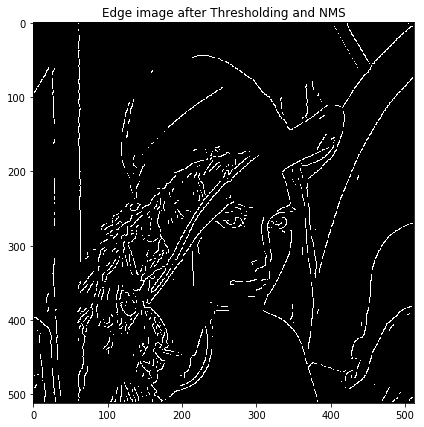

In [10]:
plt.figure(figsize=(7,7))
plt.title('Edge image after Thresholding and NMS')
plt.imshow(edges,cmap='gray')
plt.show()

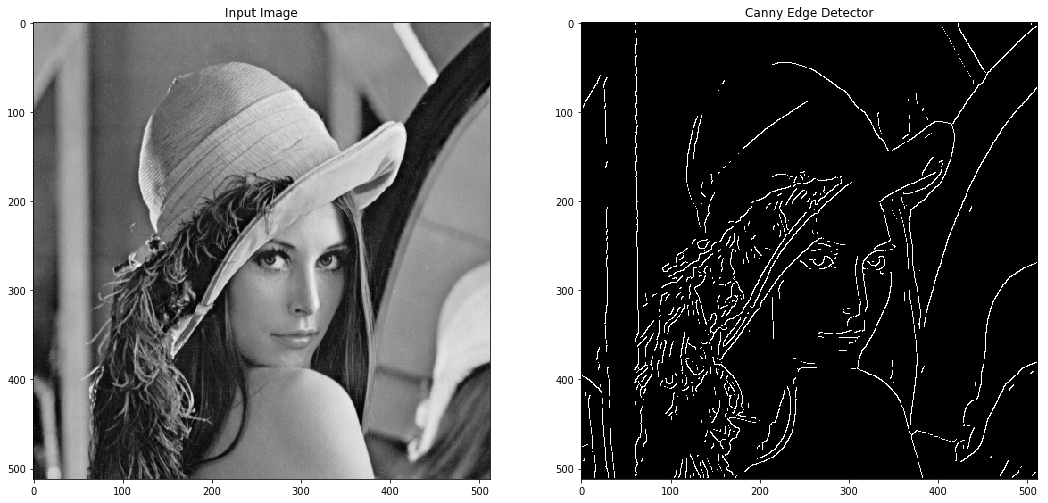

In [11]:
f, ax_arr = plt.subplots(1, 2, figsize=(18, 16))
ax_arr[0].set_title("Input Image")
ax_arr[1].set_title("Canny Edge Detector")
ax_arr[0].imshow(im, cmap='gray')
ax_arr[1].imshow(edges, cmap='gray')

### One can see that the image on the right contain edges from our original image. We can notice that the result from non-max suppression is not very perfect - some edges are not actually edges but noise in the image. This can be fixed and if you are interested, please refer to http://justin-liang.com/tutorials/canny/#gradient. 

Let me know if you have any comments or suggestions. Thanks !